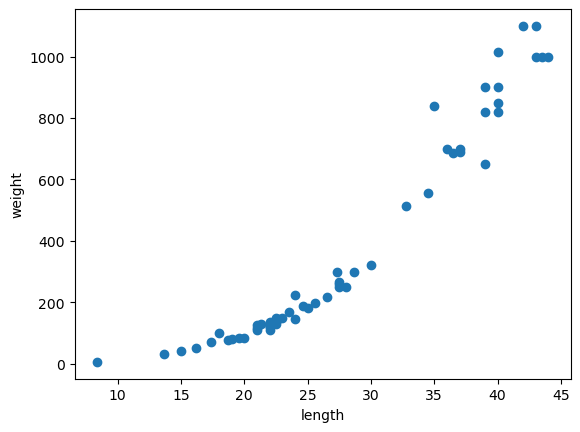

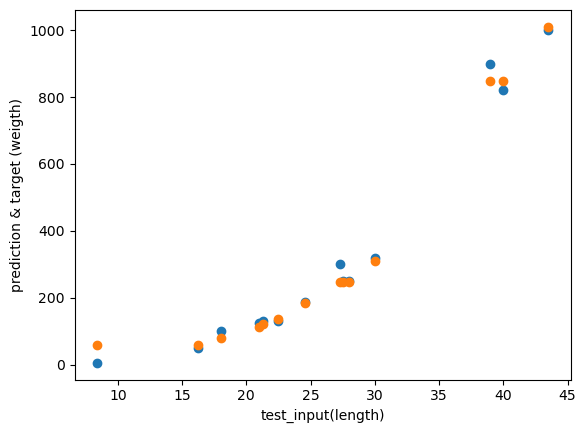

score about test_set(k = 5) : 0.992809406101064
19.157142857142862


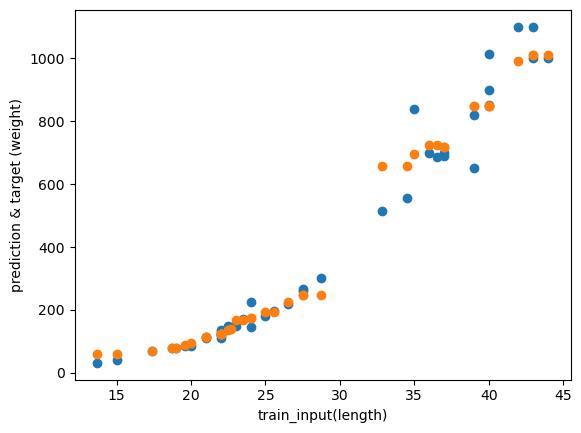

score about train_set(k = 5) : 0.9698823289099254


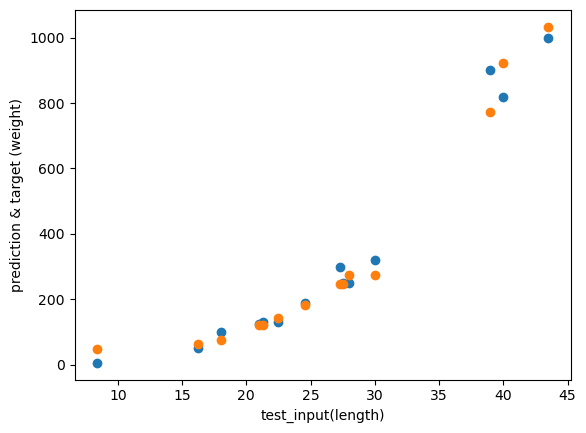

score about test set(k = 3) : 0.9746459963987609


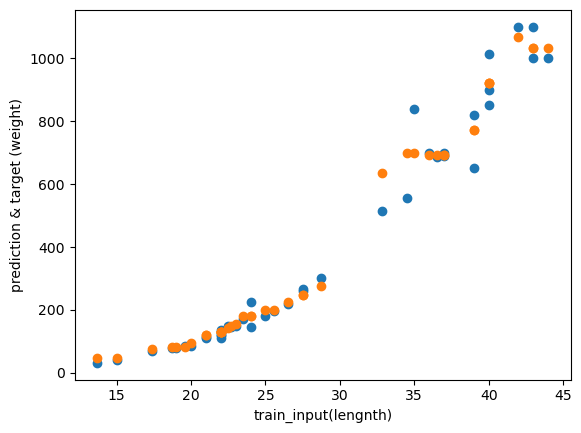

score about train set (k = 3) : 0.9804899950518966


In [1]:
#We implement machine learning model that predict weight when given length of fish with knn regression model

import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
#perch_length split into train_input and train_target
#perch_weigth split into test_input and 

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1,1)
train_target = train_target.reshape(-1,1)
test_target = test_target.reshape(-1,1)

#KneighborsRegressor는 클래스다.
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

prediction = knr.predict(test_input)


#This plot is show accuracy of prediction about test data set (k = 5)
plt.figure() 
plt.scatter(test_input, test_target)
plt.scatter(test_input, prediction)
plt.xlabel('test_input(length)')
plt.ylabel('prediction & target (weigth)')
plt.show()

print('score about test_set(k = 5) :', knr.score(test_input, test_target))
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_target, prediction)
print(mae)


#This plot is show accuracy of prediction about train data set (k = 5)
plt.figure() 
prediction = knr.predict(train_input)
plt.scatter(train_input, train_target)
plt.scatter(train_input, prediction)
plt.xlabel('train_input(length)')
plt.ylabel('prediction & target (weight)')
plt.show()
print('score about train_set(k = 5) :', knr.score(train_input, train_target))

#test_set_score > train_set_score
#underfitting!! (normally, train_set_score > test_set_score cuz, machine is trained with train data set)
#So, we have several solution
#we can get lower k value
#If we lower the k value in the knn algorithm, the model becomes more sensitive to local patterns rather than the overall patterns that appear throughout the data.

# set k = 3
knr.n_neighbors = 3

# retrain knr-model with k = 3
knr.fit(train_input, train_target) 


#This plot is show accuracy of prediction about test data set (k = 3)
prediction = knr.predict(test_input)
plt.scatter(test_input, test_target)
plt.scatter(test_input, prediction)
plt.xlabel('test_input(length)')
plt.ylabel('prediction & target (weight)')
plt.show()
print('score about test set(k = 3) :', knr.score(test_input, test_target))


#This plot is show accuracy of prediction about train data set (k = 3)
prediction = knr.predict(train_input)
plt.figure()
plt.scatter(train_input, train_target)
plt.scatter(train_input, prediction)
plt.xlabel('train_input(lengnth)')
plt.ylabel('prediction & target (weight)')
plt.show()
print('score about train set (k = 3) :', knr.score(train_input, train_target))
